In [ ]:
# We will use the following packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Data_Projects/ML-Project/pmx_gasoline_theft_prediction'

/content/drive/MyDrive/Data_Projects/ML-Project/pmx_gasoline_theft_prediction


In [ ]:
# Importing our data

df_thefts_PMX = pd.read_excel("data/df_thefts_PMX_final.xlsx", converters={'CVEGEO' : str})



In [ ]:
#Fill 0s in Gas_prices NaN values
df_thefts_PMX['Gas_price'] = df_thefts_PMX['Gas_price'].fillna(0)
df_thefts_PMX.head()

,Mun_code,Pipe_intersec,Gas_stations,Gas_price,Confront_events,IRS,Homic_rate,Susceptible
0,1001,22,12.26,17.78,0,-1.3456,5.41,1
1,1002,3,10.32,17.93,0,-0.8732,4.13,0
2,1004,5,12.39,17.85,0,-1.0391,6.20,0
3,1005,5,23.35,17.84,0,-1.1825,4.83,0
4,1006,8,14.91,17.83,0,-1.1859,4.26,1


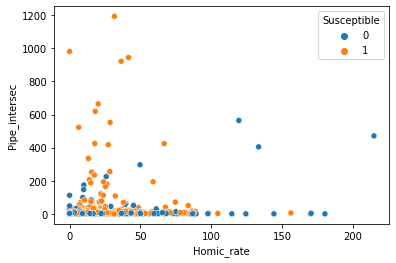

In [ ]:
# scatter plot using 

sns.scatterplot(x = "Homic_rate", 
                y = "Pipe_intersec", 
                hue = "Susceptible", data = df_thefts_PMX);

In [ ]:
# We will now set data and target 
X = df_thefts_PMX.drop(columns="Susceptible")
y = df_thefts_PMX["Susceptible"]
X.columns

Index(['Mun_code', 'Pipe_intersec', 'Gas_stations', 'Gas_price',
       'Confront_events', 'IRS', 'Homic_rate'],
      dtype='object')

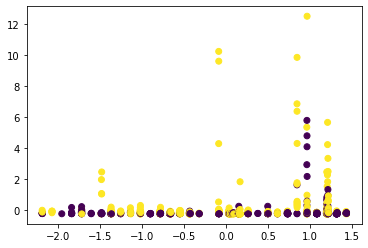

In [ ]:
# Preprocessing the data

X_new = StandardScaler().fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y);

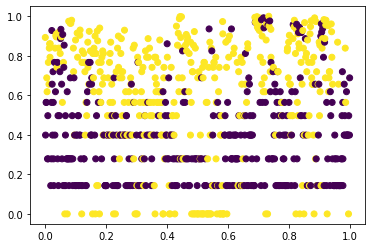

In [ ]:
# QuantileTransformer

from sklearn.preprocessing import QuantileTransformer

X_new2 = QuantileTransformer(n_quantiles = 500).fit_transform(X)
plt.scatter(X_new2[:, 0], X_new2[:, 1], c=y);

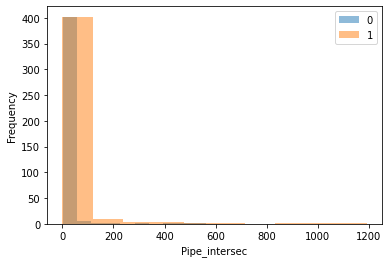

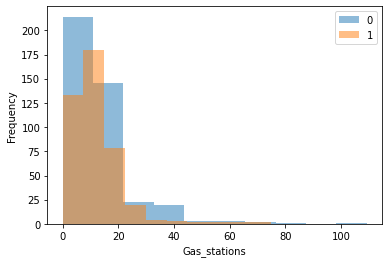

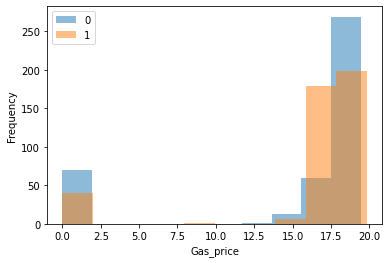

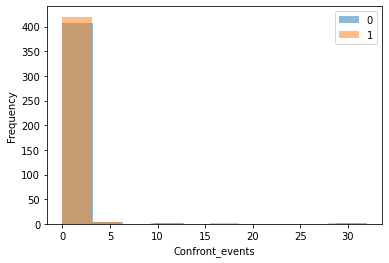

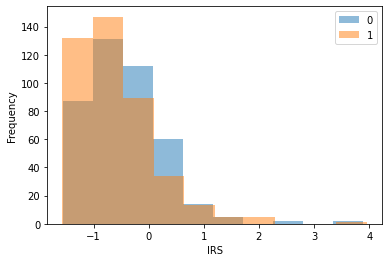

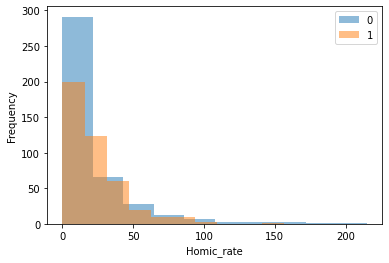

In [ ]:
#Check the variables distribution - histogram

# Plot one histogram per variable

for variable_name in df_thefts_PMX[['Pipe_intersec', 'Gas_stations',
                                    'Gas_price','Confront_events', 
                                    'IRS', 'Homic_rate']]:
                                   plt.figure()
                                   # plot the histogram for each specie
                                   df_thefts_PMX.groupby("Susceptible")[variable_name].plot.hist(alpha=0.5, legend=True)
                                   plt.xlabel(variable_name)

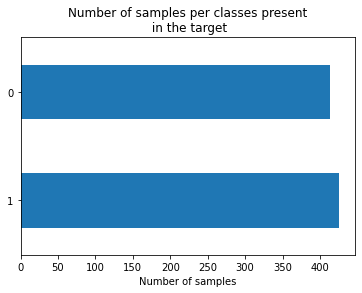

In [ ]:
import matplotlib.pyplot as plt

y.value_counts().plot.barh()
plt.xlabel("Number of samples")
_ = plt.title("Number of samples per classes present\n in the target")

In [ ]:
# Set up training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, random_state=123, test_size=0.3)

In [ ]:
# Preprocessing the data
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('model', LogisticRegression())
                 ])

classifier = pipe.fit(X_train, y_train)





In [ ]:
# Here we predict using our unseen data (X_test)
#classifier = LogisticRegression()
target_predicted = pipe.predict(X_test)
target_predicted

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
y_test

654    1
275    1
327    1
285    0
280    0
      ..
689    1
699    1
692    0
250    1
124    1
Name: Susceptible, Length: 252, dtype: int64

In [ ]:
accuracy = accuracy_score(y_test, target_predicted)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.60


In [ ]:
classifier.score(X_test, y_test)

0.5992063492063492

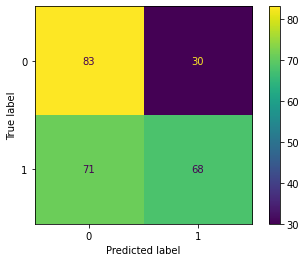

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test) 

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, target_predicted)
recall = recall_score(y_test, target_predicted)

print(f"Precision score: {precision:.2f}")
print(f"Recall score: {recall:.2f}")

Precision score: 0.69
Recall score: 0.49


In [ ]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X_train, y_train)
print(f"Accuracy of the dummy classifier: "
      f"{dummy_classifier.score(X_test, y_test):.3f}")

Accuracy of the dummy classifier: 0.448


In [ ]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy = balanced_accuracy_score(y_test, target_predicted)
print(f"Balanced accuracy: {balanced_accuracy:.2f}")

Balanced accuracy: 0.61
